In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
#Used the parse_dates parameter to do the pd.to_datetime in the read_csv function call
#also set the index to the first column, which was made a datetime series in the parse_dates parameter
raw = pd.read_csv('https://gist.githubusercontent.com/zgulde/96991fedca29ff5371f5e7fa00d3fa95/raw/3e95d04e4ae544bf7b03b89dfde002ff502260a1/the_data.csv', 
                  parse_dates=[0],
                  index_col=[0]
                 )

In [86]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2018-04-30 00:00:00 to 2018-05-01 23:00:00
Data columns (total 2 columns):
x    48 non-null float64
y    48 non-null object
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [5]:
blob = pd.read_csv('https://gist.githubusercontent.com/zgulde/96991fedca29ff5371f5e7fa00d3fa95/raw/3e95d04e4ae544bf7b03b89dfde002ff502260a1/the_data.csv')

In [8]:
blob.timestamp = pd.to_datetime(blob.timestamp)


In [11]:
blob = blob.set_index('timestamp')

In [13]:
blob.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2018-04-30 00:00:00 to 2018-05-01 23:00:00
Data columns (total 2 columns):
x    48 non-null float64
y    48 non-null object
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


## By Group

In [91]:
blob.groupby('y').describe()

x                                                      
  count      mean       std   min     25%   50%     75%   max
y                                                            
A  18.0 -0.110556  0.925784 -1.30 -0.9075 -0.08  0.2575  1.84
B  13.0 -0.053846  1.328731 -2.05 -0.8100  0.20  0.7400  1.91
C  17.0  0.232353  1.108594 -1.83 -0.1300  0.28  0.9800  2.06

In [32]:
#     What is the maximum x value for group B?
blob[blob.y == 'B']['x'].max()

1.91

In [87]:
#    What is the average x value for group A?
blob[blob.y == 'A']['x'].mean()

-0.11055555555555556

In [88]:
#    What is the average x value for group C?
blob[blob.y == 'C']['x'].mean()

0.2323529411764706

In [98]:
#    Which group has the highest sum of x values?
blob.groupby('y').sum()

,x
y,
A,-1.99
B,-0.70
C,3.95


In [97]:
blob.groupby('y').sum().idxmax()

x    C
dtype: object

## Time Aggregates

In [95]:
blob.resample('D').sum()

,x
timestamp,
2018-04-30,5.28
2018-05-01,-4.02


In [17]:
#    What is the sum of the x values for 2018-05-01?
blob['2018-05-01'].sum()

x                       -4.02
y    BAAACABBBBCCCACCACACCABC
dtype: object

In [22]:
#    What is the average x value for each day? 
blob.resample('D')['x'].mean()

timestamp
2018-04-30    0.2200
2018-05-01   -0.1675
Freq: D, Name: x, dtype: float64

In [21]:
#    The median?
blob.resample('D')['x'].median()

timestamp
2018-04-30    0.175
2018-05-01    0.220
Freq: D, Name: x, dtype: float64

In [23]:
#    Which day has the largest x value?
blob.resample('D')['x'].max()

timestamp
2018-04-30    2.06
2018-05-01    1.91
Freq: D, Name: x, dtype: float64

In [25]:
#    Which day has the smallest x value for group C?
blob[blob.y == 'C'].resample('D')['x'].min()

timestamp
2018-04-30   -1.07
2018-05-01   -1.83
Freq: D, Name: x, dtype: float64

## Visualization

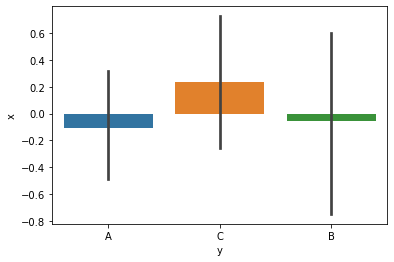

In [40]:
#    Visualize the minimum x value of each group with a bar chart.
sns.barplot(x="y", y="x", data=blob)

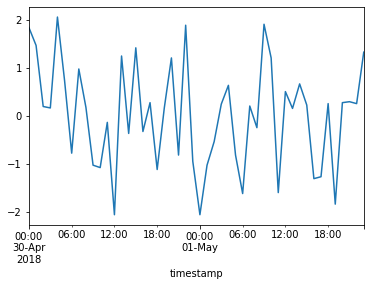

In [41]:
#    Visualize x over time.
blob.x.plot()

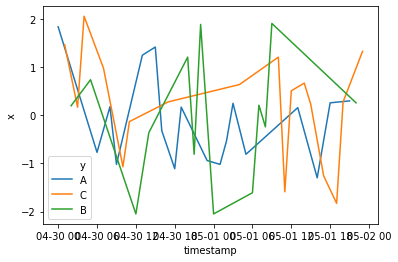

In [44]:
#    Visualize x over time by y value.
sns.lineplot(x=blob.index, y="x", hue='y', data=blob)

## More Aggregation

In [46]:
#    What is the least frequent y value for 2018-04-30?
blob['2018-04-30'].groupby('y').count()

,x
y,
A,10
B,7
C,7


In [62]:
#    What is the most frequent y value for each day?

In [54]:
blob['2018-04-30'].groupby('y').count()

,x
y,
A,10
B,7
C,7


In [55]:
blob['2018-05-01'].groupby('y').count()

,x
y,
A,8
B,6
C,10


In [61]:
for i in blob.resample('D'):
    #print(type(i[1]))
    print(i[1].groupby('y').count())

    x
y    
A  10
B   7
C   7
    x
y    
A   8
B   6
C  10


## Looking at my auth_log on my djangoServer

#### I used cut -f on my command line to split up the log file into the first 5 fields, and then the message as a another

In [1]:
log_cols = ['month','day','time', 'host', 'protocol']

In [10]:
message_col = ['error message']

In [4]:
df = pd.read_table('/Users/fredricklambuth/Documents/first5fields.txt', names=log_cols, sep=" ")

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [11]:
df2 = pd.read_table('/Users/fredricklambuth/Documents/logMessage.txt', names=message_col)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [5]:
df.columns

Index(['month', 'day', 'time', 'host', 'protocol'], dtype='object')

In [8]:
df2

,pam_unix(cron:session): session closed for user root
0,Invalid user kogepan from 61.175.134.190 port ...
1,pam_unix(sshd:auth): check pass; user unknown
2,pam_unix(sshd:auth): authentication failure; l...
3,Failed password for invalid user kogepan from ...
4,Received disconnect from 61.175.134.190 port 1...
5,Disconnected from invalid user kogepan 61.175....
6,Invalid user capps from 148.66.135.178 port 47390
7,pam_unix(sshd:auth): check pass; user unknown
8,pam_unix(sshd:auth): authentication failure; l...
9,Failed password for invalid user capps from 14...


In [12]:
df.merge(df2, left_on=df.index, right_on=df2.index)

,key_0,month,day,time,host,protocol,message
0,0,Nov,25,06:25:02,localhost,CRON[12322]:,pam_unix(cron:session): session closed for use...
1,1,Nov,25,06:25:55,localhost,sshd[12527]:,Invalid user kogepan from 61.175.134.190 port ...
2,2,Nov,25,06:25:55,localhost,sshd[12527]:,pam_unix(sshd:auth): check pass; user unknown
3,3,Nov,25,06:25:55,localhost,sshd[12527]:,pam_unix(sshd:auth): authentication failure; l...
4,4,Nov,25,06:25:56,localhost,sshd[12527]:,Failed password for invalid user kogepan from ...
5,5,Nov,25,06:25:57,localhost,sshd[12527]:,Received disconnect from 61.175.134.190 port 1...
6,6,Nov,25,06:25:57,localhost,sshd[12527]:,Disconnected from invalid user kogepan 61.175....
7,7,Nov,25,06:26:12,localhost,sshd[12529]:,Invalid user capps from 148.66.135.178 port 47390
8,8,Nov,25,06:26:12,localhost,sshd[12529]:,pam_unix(sshd:auth): check pass; user unknown
9,9,Nov,25,06:26:12,localhost,sshd[12529]:,pam_unix(sshd:auth): authentication failure; l...
